The study is focused on survival analysis of heart failure patients, aged 40 years or above, admitted to Institute of Cardiology and Allied hospital Faisalabad-Pakistan. There are a total of 299 patients in the study. Out of the 299 patients in the study, 105 are women and 194 are men

The dataset contains 13 features, which report clinical, body, and lifestyle information, that we briefly describe here. Age, serum sodium, serum creatinine, gender, smoking, Blood Pressure (BP), Ejection Fraction (EF), anemia, platelets, Creatinine Phosphokinase (CPK) and diabetes were considered as potential variables explaining mortality caused by CHD. Age, serum sodium and Creatinine Phosphokinase (CPK) are continuous variables whereas EF, serum creatinine and platelets were taken as categorical variables.

The paper mentions that heart failure occurs when the heart is unable to pump enough blood to the body, and it is usually caused by diabetes, high blood pressure, or other heart conditions or diseases.

The main objective of this study is to estimate death rates due to heart failure 

[Link to the reseach paper](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec2)

# Heart Failure Prediction using Machine Learning

## Data Pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')

In [ ]:
#Check if there are any missing values in each features.
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

##### There are no missing data in the dataset



##### The class labels are already encoded.
##### The data also contains sex, anemia, diabetes, high blood pressure, smoking, death_event encoded as 0 and 1 which are categorical data.

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### **DEATH_EVENT** is the dependent variable and the rest are independent variable.

In [ ]:
data = df.to_numpy()
X = data[:, :-1]
Y = data[:, -1]

In [ ]:
np.bincount(Y.astype(int))

array([203,  96])

##### We can see that the data is highly disproportional in terms of the frequencies of death_event




In [ ]:
# Checking X and Y vectors have the right shape.
n, m = X.shape
print(n, m)
# Checking X and Y vectors have right data.
assert(X[0][0] == 75)
assert(X[0][-1] == 4)
assert(Y[0] == 1)

299 12


In [ ]:
# Assigning 30% of dataset for training.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.3, stratify = Y)

In [ ]:
# Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

model_scores = []

## Training and Predicting using different Estimators

### Logistic Regression

##### Accuracy

In [ ]:
#Creating param grids for Logistic Regression
c_values = np.linspace(-1,1,25)

grid = [
  {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C' : c_values},
  {'penalty': ['l2'], 'solver': ['newton-cg', 'sag', 'lbfgs'], 'C' : c_values},
  {'penalty': ['elasticnet'], 'solver': ['saga'], 'C' : c_values, 'l1_ratio' : np.linspace(0, 1, 25)},
]


lr_accuracy = LogisticRegression(class_weight='balanced')
lr_accuracy_gs = GridSearchCV(estimator=lr_accuracy, param_grid=grid, cv = 5, n_jobs=-1, scoring='accuracy')

lr_accuracy_gs.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([-1.        , -0.916666...
                          'l1_ratio': array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.

In [ ]:
best_lr_accuracy = lr_accuracy_gs.best_estimator_

print("Best Hyperparameters", lr_accuracy_gs.best_params_)
print('Training score:', lr_accuracy_gs.best_score_)

print('Test score:', best_lr_accuracy.score(X_test_std, Y_test))
model_scores.append([lr_accuracy_gs.best_score_, best_lr_accuracy.score(X_test_std, Y_test)])

Best Hyperparameters {'C': 0.16666666666666652, 'l1_ratio': 0.29166666666666663, 'penalty': 'elasticnet', 'solver': 'saga'}
Training score: 0.8044134727061557
Test score: 0.8444444444444444


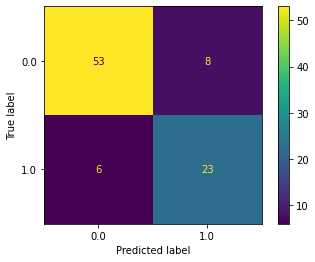

In [ ]:
plot_confusion_matrix(best_lr_accuracy, X_test_std, Y_test)
plt.show() 

##### Recall

In [ ]:
#Creating param grids for Logistic Regression
c_values = np.linspace(0, 3, 20)

grid = [
  {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C' : c_values},
  {'penalty': ['l2'], 'solver': ['newton-cg', 'sag', 'lbfgs'], 'C' : c_values},
  {'penalty': ['elasticnet'], 'solver': ['saga'], 'C' : c_values, 'l1_ratio' : np.linspace(0, 1, 25)},
]

lr_recall = LogisticRegression(class_weight='balanced')
lr_recall_gs = GridSearchCV(estimator=lr_recall, param_grid=grid, cv = 5, n_jobs=-1, scoring='recall')

lr_recall_gs.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([0.        , 0.15789474...
                          'l1_ratio': array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.

In [ ]:
best_lr_recall = lr_recall_gs.best_estimator_

print("Best Hyperparameters", lr_recall_gs.best_params_)
print('Training score:', lr_recall_gs.best_score_)
print('Test score:', best_lr_recall.score(X_test_std, Y_test))
model_scores.append([lr_recall_gs.best_score_, best_lr_recall.score(X_test_std, Y_test)])

Best Hyperparameters {'C': 0.15789473684210525, 'penalty': 'l2', 'solver': 'newton-cg'}
Training score: 0.7923076923076924
Test score: 0.8222222222222222


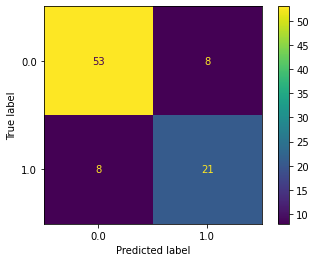

In [ ]:
plot_confusion_matrix(best_lr_recall, X_test_std, Y_test)
plt.show() 

##### Precision

In [ ]:
#Creating param grids for Logistic Regression
c_values = np.logspace(-4.5, 0, 20, endpoint=False)
grid = [
  {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C' : c_values},
  {'penalty': ['l2'], 'solver': ['newton-cg', 'sag', 'lbfgs'], 'C' : c_values},
  {'penalty': ['elasticnet'], 'solver': ['saga'], 'C' : c_values, 'l1_ratio' : np.logspace(-6, -1, 25)},
]

lr_precision = LogisticRegression(class_weight='balanced')
lr_precision_gs = GridSearchCV(estimator=lr_precision, param_grid=grid, cv = 5, n_jobs=-1, scoring='precision')

lr_precision_gs.fit(X_train_std, Y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([3.16227766e-0...
       4.64158883e-05, 7.49894209e-05, 1.21152766e-04, 1.95734178e-04,
       3.16227766e-04, 5.10896977e-04, 8.25404185e-04, 1.33352143e-03,
       2.15443469e-03, 3.48070059e-03, 5.62341325e-03, 9.08517576e-03,
       1.46779927e-02, 2.37137371e-02, 3.83118685e-02, 6.18965819e-02,
       1.

In [ ]:
best_lr_precision = lr_precision_gs.best_estimator_

print("Best Hyperparameters", lr_precision_gs.best_params_)
print('Training score:', lr_precision_gs.best_score_)
print('Test score:', best_lr_precision.score(X_test_std, Y_test))
model_scores.append([lr_precision_gs.best_score_, best_lr_precision.score(X_test_std, Y_test)])

Best Hyperparameters {'C': 5.308844442309879e-05, 'l1_ratio': 6.8129206905796085e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
Training score: 0.7773426573426574
Test score: 0.8444444444444444


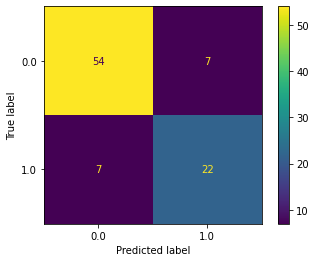

In [ ]:
plot_confusion_matrix(best_lr_precision, X_test_std, Y_test)
plt.show() 

##### F1

In [ ]:
#Creating param grids for Logistic Regression
c_values = np.logspace(-8, -5, 20)
grid = [
  {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'C' : c_values},
  {'penalty': ['l2'], 'solver': ['newton-cg', 'sag', 'lbfgs'], 'C' : c_values},
  {'penalty': ['elasticnet'], 'solver': ['saga'], 'C' : c_values, 'l1_ratio' : np.logspace(-7, -3, 20)}
]

lr_f1 = LogisticRegression(class_weight='balanced')
lr_f1_gs = GridSearchCV(estimator=lr_f1, param_grid=grid, cv = 5, n_jobs=-1, scoring='f1')

lr_f1_gs.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-0...
       6.95192796e-07, 1.12883789e-06, 1.83298071e-06, 2.97635144e-06,
       4.83293024e-06, 7.84759970e-06, 1.27427499e-05, 2.06913808e-05,
       3.35981829e-05, 5.45559478e-05, 8.85866790e-05, 1.43844989e-04,
       2.33572147e-04, 3.79269019e-04, 6.15848211e-04, 1.00000000e-03]),
       

In [ ]:
best_lr_f1 = lr_f1_gs.best_estimator_

print("Best Hyperparameters", lr_f1_gs.best_params_)
print('Training score:', lr_f1_gs.best_score_)
print('Test score:', best_lr_f1.score(X_test_std, Y_test))
model_scores.append([lr_f1_gs.best_score_, best_lr_f1.score(X_test_std, Y_test)])

Best Hyperparameters {'C': 1.8329807108324375e-07, 'penalty': 'l2', 'solver': 'newton-cg'}
Training score: 0.7081066411238826
Test score: 0.8222222222222222


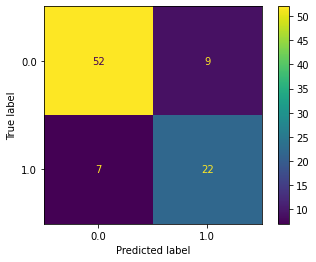

In [ ]:
plot_confusion_matrix(best_lr_f1, X_test_std, Y_test)
plt.show() 

### Support Vector Machine

##### Accuracy

In [ ]:
#Creating param grids for Support Vector Machine
c_range = np.linspace(0, 1, 20)

degree_range = [2, 3, 4, 5, 6]
grid = [
  {'C' : c_range, 'degree' : degree_range, 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma' : ['scale', 'auto']},
]

svc_accuracy = SVC(class_weight='balanced')
svc_accuracy_gs = GridSearchCV(estimator=svc_accuracy, param_grid=grid, cv = 5, n_jobs=-1, scoring='accuracy')
svc_accuracy_gs.fit(X_train_std, Y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([0.        , 0.05263158, 0.10526316,...0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                          'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

In [ ]:
best_svc_accuracy = svc_accuracy_gs.best_estimator_

print("Best Hyperparameters", svc_accuracy_gs.best_params_)
print('Training score:', svc_accuracy_gs.best_score_)
print('Test score:', best_svc_accuracy.score(X_test_std, Y_test))
model_scores.append([svc_accuracy_gs.best_score_, best_svc_accuracy.score(X_test_std, Y_test)])

Best Hyperparameters {'C': 0.2631578947368421, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Training score: 0.7995354239256678
Test score: 0.7666666666666667


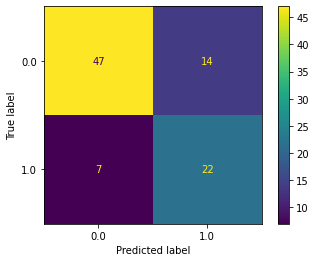

In [ ]:
plot_confusion_matrix(best_svc_accuracy, X_test_std, Y_test)
plt.show() 

##### Precision

In [ ]:
c_range = np.linspace(2, 5, 20)
degree_range = [2, 3, 4, 5, 6, 7, 8]
grid = [
  {'C' : c_range, 'degree' : degree_range, 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma' : ['scale', 'auto']},
]

svc_precision = SVC(class_weight='balanced')
# svc_precision = SVC(class_weight={'0.0': 2, '': 1})
svc_precision_gs = GridSearchCV(estimator=svc_precision, param_grid=grid, cv = 5, n_jobs=-1, scoring='precision')
svc_precision_gs.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([2.        , 2.15789474, 2.31578947,...57895,
       2.78947368, 2.94736842, 3.10526316, 3.26315789, 3.42105263,
       3.57894737, 3.73684211, 3.89473684, 4.05263158, 4.21052632,
       4.36842105, 4.52631579, 4.68421053, 4.84210526, 5.        ]),
                          'degree': [2, 3, 4, 5, 6, 7, 8],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=

In [ ]:
best_svc_precision = svc_precision_gs.best_estimator_

print("Best Hyperparameters", svc_precision_gs.best_params_)
print('Training score:', svc_precision_gs.best_score_)
print('Test score:', best_svc_precision.score(X_test_std, Y_test))
model_scores.append([svc_precision_gs.best_score_, best_svc_precision.score(X_test_std, Y_test)])

Best Hyperparameters {'C': 2.6315789473684212, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
Training score: 0.8457142857142858
Test score: 0.7111111111111111


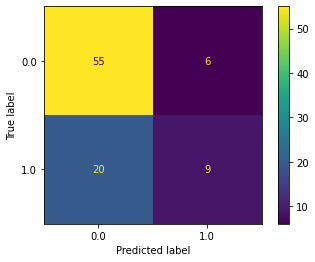

In [ ]:
plot_confusion_matrix(best_svc_precision, X_test_std, Y_test)
plt.show() 

##### Recall

In [ ]:
c_range = np.linspace(0,5, 20, endpoint=False)
degree_range = [2, 3, 4, 5, 6, 7, 8]
grid = [
  {'C' : c_range, 'degree' : degree_range, 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma' : ['scale', 'auto']},
]

svc_recall = SVC(class_weight='balanced')
svc_recall_gs = GridSearchCV(estimator=svc_recall, param_grid=grid, cv = 5, n_jobs=-1, scoring='recall')
svc_recall_gs.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75]),
                          'degree': [2, 3, 4, 5, 6, 7, 8],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
best_svc_recall = svc_recall_gs.best_estimator_

print("Best Hyperparameters", svc_recall_gs.best_params_)
print('Training score:', svc_recall_gs.best_score_)
print('Test score:', best_svc_recall.score(X_test_std, Y_test))
model_scores.append([svc_recall_gs.best_score_, best_svc_recall.score(X_test_std, Y_test)])

Best Hyperparameters {'C': 1.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
Training score: 0.8362637362637363
Test score: 0.7666666666666667


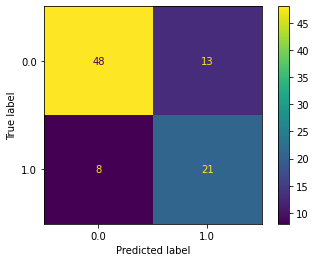

In [ ]:
plot_confusion_matrix(best_svc_recall, X_test_std, Y_test)
plt.show() 

##### F1

In [ ]:
# c_range = np.linspace(-2, 2, 20)
c_range = np.logspace(-4, -1, 20)
degree_range = [2, 3, 4, 5, 6, 7, 8]
grid = [
  {'C' : c_range, 'degree' : degree_range, 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma' : ['scale', 'auto']},
]

svc_f1 = SVC(class_weight='balanced')
svc_f1_gs = GridSearchCV(estimator=svc_f1, param_grid=grid, cv = 10, n_jobs=-1, scoring='f1')
svc_f1_gs.fit(X_train_std, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([0.0001    , 0.00014384, 0.0002...64, 0.00042813,
       0.00061585, 0.00088587, 0.00127427, 0.00183298, 0.00263665,
       0.00379269, 0.00545559, 0.0078476 , 0.01128838, 0.01623777,
       0.02335721, 0.03359818, 0.0483293 , 0.06951928, 0.1       ]),
                          'degree': [2, 3, 4, 5, 6, 7, 8],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', r

In [ ]:
best_svc_f1 = svc_f1_gs.best_estimator_

print("Best Hyperparameters", svc_f1_gs.best_params_)
print('Training score:', svc_f1_gs.best_score_)
print('Test score:', best_svc_f1.score(X_test_std, Y_test))
model_scores.append([svc_f1_gs.best_score_, best_svc_f1.score(X_test_std, Y_test)])

Best Hyperparameters {'C': 0.03359818286283781, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
Training score: 0.726491008991009
Test score: 0.8222222222222222


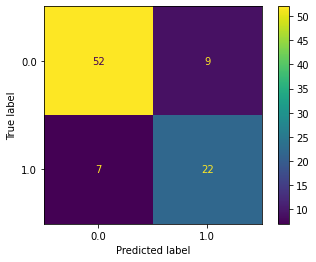

In [ ]:
plot_confusion_matrix(best_svc_f1, X_test_std, Y_test)
plt.show() 

### MLP Classifiers

##### Accuracy

In [ ]:
#Creating param grids for MLP
alpha_range = np.logspace(-3, 1, 25, endpoint=True)
grid = [
  {'hidden_layer_sizes': [(12, ), (10,32)], 'activation' : ['logistic'], 'solver' : ['lbfgs', 'sgd', 'adam'], 'alpha' : alpha_range},
]

mlp_accuracy = MLPClassifier(max_iter=500)
mlp_gs_accuracy = GridSearchCV(estimator=mlp_accuracy, param_grid=grid, cv = 5, n_jobs=-1, scoring='accuracy')
mlp_gs_accuracy.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=500, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
       1.00000000e-01, 1.46779927e-01, 2.15443469e-01, 3.16227766e-01,
       4.64158883e-01, 6.81292069e-01, 1.00000000e+00, 1.46779927e+00,
       2.15443469e+00, 3.16227766e+00, 4.64158883e+00, 6.81292069e+00,
       1.00000000e+01]),
                          'hidden_layer_size

In [ ]:
best_mlp_accuracy = mlp_gs_accuracy.best_estimator_

print("Best Hyperparameters", mlp_gs_accuracy.best_params_)
print('Training score:', mlp_gs_accuracy.best_score_)
print('Test score:', best_mlp_accuracy.score(X_test_std, Y_test))
model_scores.append([mlp_gs_accuracy.best_score_, best_mlp_accuracy.score(X_test_std, Y_test)])

Best Hyperparameters {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (12,), 'solver': 'lbfgs'}
Training score: 0.837862950058072
Test score: 0.8111111111111111


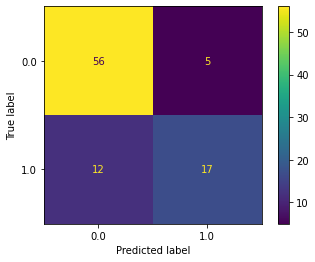

In [ ]:
plot_confusion_matrix(best_mlp_accuracy, X_test_std, Y_test)
plt.show() 

##### Precision

In [ ]:
#Creating param grids for MLP
alpha_range = np.logspace(-2, 2, 20, endpoint=True)
grid = [
  {'hidden_layer_sizes': [(12, ), (10,32)], 'activation' : ['logistic', 'tanh', 'relu'], 'solver' : ['lbfgs', 'sgd', 'adam'], 'alpha' : alpha_range},
]

mlp_precision = MLPClassifier(max_iter=250)
mlp_gs_precision = GridSearchCV(estimator=mlp_precision, param_grid=grid, cv = 5, n_jobs=-1, scoring='precision')
mlp_gs_precision.fit(X_train_std, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=250, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02

In [ ]:
best_mlp_precision = mlp_gs_precision.best_estimator_

print("Best Hyperparameters", mlp_gs_precision.best_params_)
print('Training score:', mlp_gs_precision.best_score_)
print('Test score:', best_mlp_precision.score(X_test_std, Y_test))
model_scores.append([mlp_gs_precision.best_score_, best_mlp_precision.score(X_test_std, Y_test)])

Best Hyperparameters {'activation': 'relu', 'alpha': 0.4832930238571752, 'hidden_layer_sizes': (10, 32), 'solver': 'sgd'}
Training score: 0.9
Test score: 0.7222222222222222


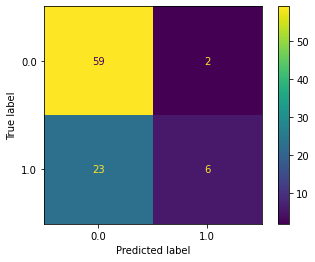

In [ ]:
plot_confusion_matrix(best_mlp_precision, X_test_std, Y_test)
plt.show() 

##### Recall

In [ ]:
#Creating param grids for MLP
alpha_range = np.logspace(-2, 2, 20, endpoint=True)
grid = [
  {'hidden_layer_sizes': [(12, ), (10,32)], 'activation' : ['logistic', 'tanh', 'relu'], 'solver' : ['lbfgs', 'sgd', 'adam'], 'alpha' : alpha_range},
]

mlp_recall = MLPClassifier(max_iter=500)
mlp_gs_recall = GridSearchCV(estimator=mlp_recall, param_grid=grid, cv = 5, n_jobs=-1, scoring='recall')
mlp_gs_recall.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=500, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02

In [ ]:
best_mlp_recall = mlp_gs_recall.best_estimator_

print("Best Hyperparameters", mlp_gs_recall.best_params_)
print('Training score:', mlp_gs_recall.best_score_)
print('Test score:', best_mlp_recall.score(X_test_std, Y_test))
model_scores.append([mlp_gs_recall.best_score_, best_mlp_recall.score(X_test_std, Y_test)])

Best Hyperparameters {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (12,), 'solver': 'lbfgs'}
Training score: 0.7296703296703296
Test score: 0.7666666666666667


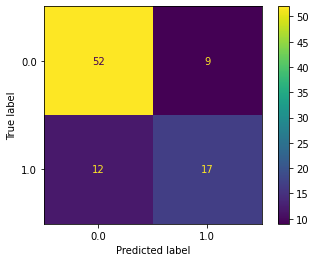

In [ ]:
plot_confusion_matrix(best_mlp_recall, X_test_std, Y_test)
plt.show()

##### F1

In [ ]:
#Creating param grids for MLP
alpha_range = np.logspace(-2, 2, 20, endpoint=True)
grid = [
  {'hidden_layer_sizes': [(12, ), (10,32)], 'activation' : ['logistic', 'tanh', 'relu'], 'solver' : ['lbfgs', 'sgd', 'adam'], 'alpha' : alpha_range},
]

mlp_f1 = MLPClassifier(max_iter=500)
mlp_gs_f1 = GridSearchCV(estimator=mlp_f1, param_grid=grid, cv = 5, n_jobs=-1, scoring='f1')
mlp_gs_f1.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=500, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02

In [ ]:
best_mlp_f1 = mlp_gs_f1.best_estimator_

print("Best Hyperparameters", mlp_gs_f1.best_params_)
print('Training score:', mlp_gs_f1.best_score_)
print('Test score:', best_mlp_f1.score(X_test_std, Y_test))
model_scores.append([mlp_gs_f1.best_score_, best_mlp_f1.score(X_test_std, Y_test)])

Best Hyperparameters {'activation': 'tanh', 'alpha': 0.7847599703514611, 'hidden_layer_sizes': (12,), 'solver': 'adam'}
Training score: 0.7252507492507492
Test score: 0.8111111111111111


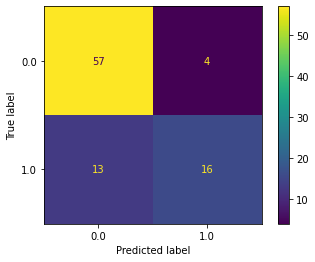

In [ ]:
plot_confusion_matrix(best_mlp_f1, X_test_std, Y_test)
plt.show()

### Decision Trees

##### Accuracy

In [ ]:
#Creating param grids for Decision Tree
grid = [
  {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'ccp_alpha' : np.logspace(-3, 0, 20)},
]

tree_accuracy = DecisionTreeClassifier(class_weight='balanced')
tree_gs_accuracy = GridSearchCV(estimator=tree_accuracy, param_grid=grid, cv = 5, n_jobs=-1, scoring='accuracy')

tree_gs_accuracy.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             i...
             param_grid=[{'ccp_alpha': array([0.001 

In [ ]:
best_tree_accuracy = tree_gs_accuracy.best_estimator_

print("Best Hyperparameters", tree_gs_accuracy.best_params_)
print('Training score:', tree_gs_accuracy.best_score_)
print('Test score:', best_tree_accuracy.score(X_test_std, Y_test))
model_scores.append([tree_gs_accuracy.best_score_, best_tree_accuracy.score(X_test_std, Y_test)])

Best Hyperparameters {'ccp_alpha': 0.11288378916846883, 'criterion': 'gini', 'splitter': 'best'}
Training score: 0.8328687572590013
Test score: 0.8555555555555555


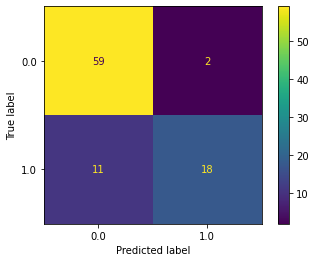

In [ ]:
plot_confusion_matrix(best_tree_accuracy, X_test_std, Y_test)
plt.show() 

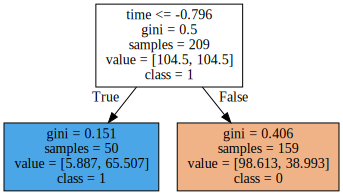

In [ ]:
dot_data = tree.export_graphviz(best_tree_accuracy, out_file=None, 
                                feature_names=[
'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],  
                                class_names=['0', '1'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

##### Recall

In [ ]:
grid = [
  {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'ccp_alpha' : np.logspace(-10, -7, 20)},
]

tree_recall = DecisionTreeClassifier(class_weight='balanced')
tree_gs_recall = GridSearchCV(estimator=tree_recall, param_grid=grid, cv = 5, n_jobs=-1, scoring='recall')
tree_gs_recall.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             i...
       4.28133240e-10, 6.15848211e-10, 8.85866790e-1

In [ ]:
best_tree_recall = tree_gs_recall.best_estimator_

print("Best Hyperparameters", tree_gs_recall.best_params_)
print('Training score:', tree_gs_recall.best_score_)
print('Test score:', best_tree_recall.score(X_test_std, Y_test))
model_scores.append([tree_gs_recall.best_score_, best_tree_recall.score(X_test_std, Y_test)])

Best Hyperparameters {'ccp_alpha': 2.3357214690901214e-08, 'criterion': 'entropy', 'splitter': 'best'}
Training score: 0.7472527472527473
Test score: 0.8222222222222222


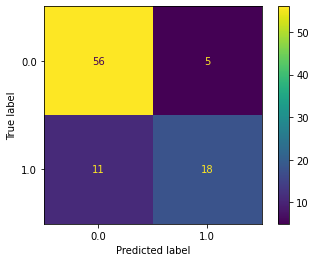

In [ ]:
plot_confusion_matrix(best_tree_recall, X_test_std, Y_test)
plt.show() 

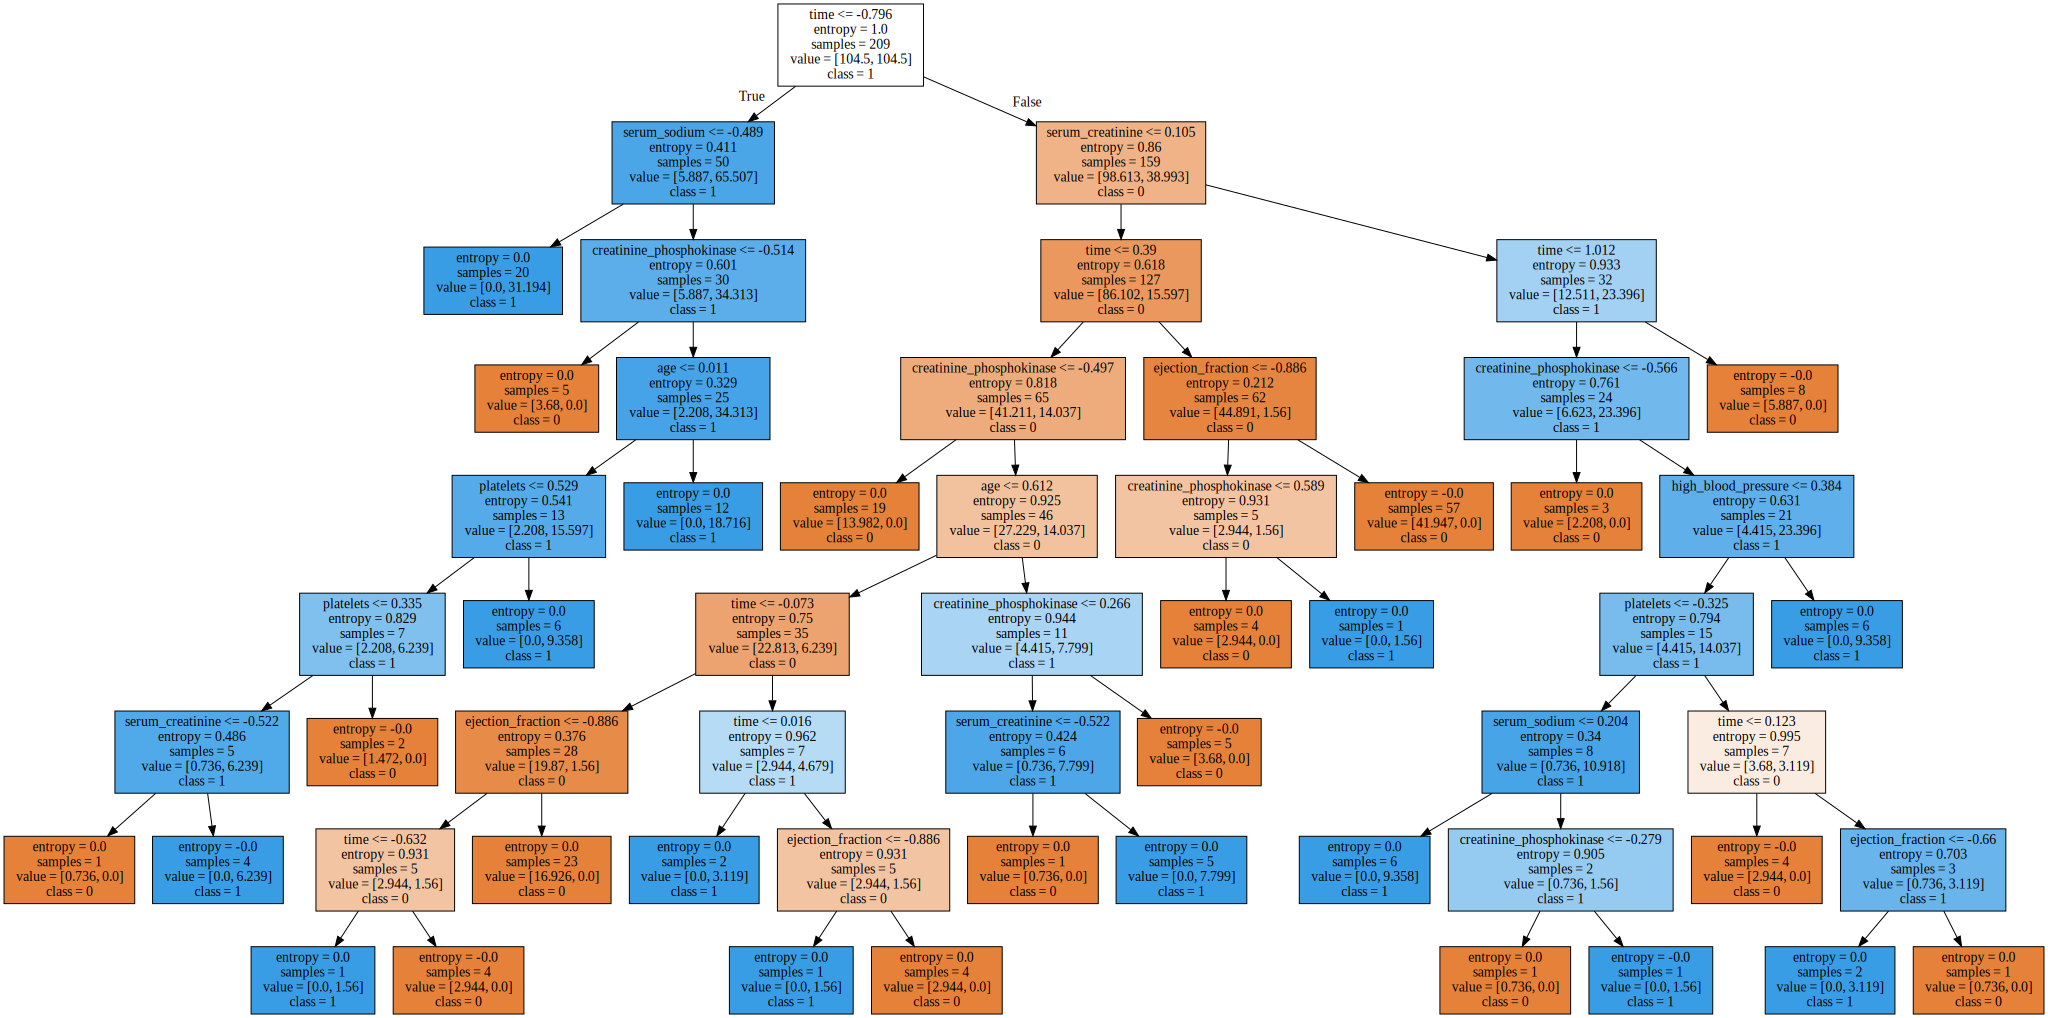

In [ ]:
dot_data = tree.export_graphviz(best_tree_recall, out_file=None, 
                                feature_names=[
'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],  
                                class_names=['0', '1'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

##### Precision

In [ ]:
#Creating param grids for Random Forest
grid = [
  {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'ccp_alpha' : np.logspace(-3, 1, 20)},
]

tree_precision = DecisionTreeClassifier()
tree_gs_precision = GridSearchCV(estimator=tree_precision, param_grid=grid, cv = 5, n_jobs=-1, scoring='precision')
tree_gs_precision.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84

In [ ]:
best_tree_precision = tree_gs_precision.best_estimator_

print("Best Hyperparameters", tree_gs_precision.best_params_)
print('Training score:', tree_gs_precision.best_score_)
print('Test score:', best_tree_precision.score(X_test_std, Y_test))
model_scores.append([tree_gs_precision.best_score_, best_tree_precision.score(X_test_std, Y_test)])

Best Hyperparameters {'ccp_alpha': 0.04832930238571752, 'criterion': 'gini', 'splitter': 'best'}
Training score: 0.843939393939394
Test score: 0.8555555555555555


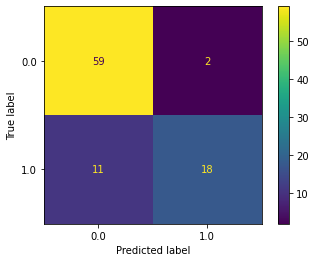

In [ ]:
plot_confusion_matrix(best_tree_precision, X_test_std, Y_test)
plt.show() 

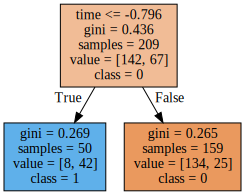

In [ ]:
dot_data = tree.export_graphviz(best_tree_precision, out_file=None, 
                                feature_names=[
'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],  
                                class_names=['0', '1'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

##### F1

In [ ]:
#Creating param grids for Random Forest
grid = [
  {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'ccp_alpha' : np.logspace(-5, 1, 20)},
]

tree_f1 = DecisionTreeClassifier(class_weight='balanced')
tree_gs_f1 = GridSearchCV(estimator=tree_f1, param_grid=grid, cv = 5, n_jobs=-1, scoring='f1')
tree_gs_f1.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             i...
       1.83298071e-04, 3.79269019e-04, 7.84759970e-0

In [ ]:
best_tree_f1 = tree_gs_f1.best_estimator_

print("Best Hyperparameters", tree_gs_f1.best_params_)
print('Training score:', tree_gs_f1.best_score_)
print('Test score:', best_tree_f1.score(X_test_std, Y_test))
model_scores.append([tree_gs_f1.best_score_, best_tree_f1.score(X_test_std, Y_test)])

Best Hyperparameters {'ccp_alpha': 0.029763514416313162, 'criterion': 'gini', 'splitter': 'best'}
Training score: 0.7340907180818192
Test score: 0.8444444444444444


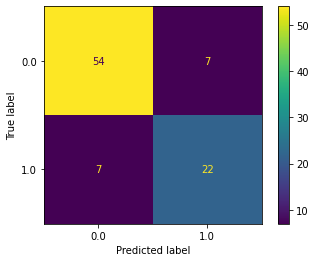

In [ ]:
plot_confusion_matrix(best_tree_f1, X_test_std, Y_test)
plt.show() 

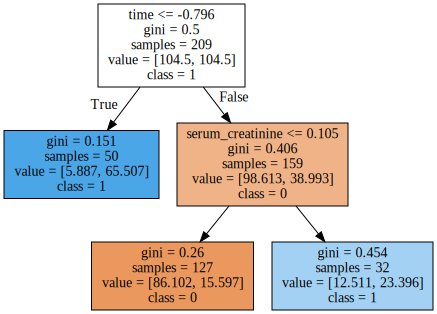

In [ ]:
dot_data = tree.export_graphviz(best_tree_f1, out_file=None, 
                                feature_names=[
'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],  
                                class_names=['0', '1'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

### Random Forest

##### Accuracy

In [ ]:
#Creating param grids for Random Forest
grid = [
  {'criterion' : ['gini', 'entropy'], 'bootstrap' : ['True', 'False'],
   'max_features' : ['auto', 'sqrt'], 'n_estimators' : [50], 'ccp_alpha' : np.logspace(-2, -1, 20)},
]

forest_accuracy = RandomForestClassifier(class_weight='balanced')
forest_gs_accuracy = GridSearchCV(estimator=forest_accuracy, param_grid=grid, cv = 5, n_jobs=-1, scoring='accuracy')
forest_gs_accuracy.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
                          'ccp_alpha': array([0.01      , 0.01128838, 0.01274275, 0.0143845 , 0.01623777,
     

In [ ]:
best_forest_accuracy = forest_gs_accuracy.best_estimator_

print("Best Hyperparameters", forest_gs_accuracy.best_params_)
print('Training accuracy:', forest_gs_accuracy.best_score_)
print('Test accuracy:', best_forest_accuracy.score(X_test_std, Y_test))
model_scores.append([forest_gs_accuracy.best_score_, best_forest_accuracy.score(X_test_std, Y_test)])

Best Hyperparameters {'bootstrap': 'False', 'ccp_alpha': 0.018329807108324356, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Training accuracy: 0.8759581881533102
Test accuracy: 0.8666666666666667


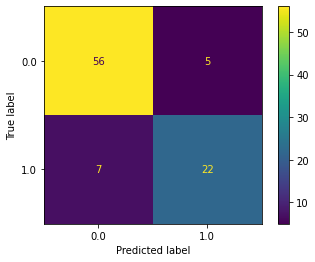

In [ ]:
plot_confusion_matrix(best_forest_accuracy, X_test_std, Y_test)
plt.show() 

##### Precision

In [ ]:
#Creating param grids for Random Forest
grid = [
  {'criterion' : ['gini', 'entropy'], 'bootstrap' : ['True', 'False'],
   'max_features' : ['auto', 'sqrt'], 'n_estimators' : [50], 'ccp_alpha' : np.logspace(-2, -1, 20)},
]

forest_precision = RandomForestClassifier(class_weight='balanced')
forest_gs_precision = GridSearchCV(estimator=forest_precision, param_grid=grid, cv = 5, n_jobs=-1, scoring='precision')
forest_gs_precision.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
                          'ccp_alpha': array([0.01      , 0.01128838, 0.01274275, 0.0143845 , 0.01623777,
     

In [ ]:
best_forest_precision = forest_gs_precision.best_estimator_

print("Best Hyperparameters", forest_gs_precision.best_params_)
print('Training score:', forest_gs_precision.best_score_)
print('Test score:', best_forest_precision.score(X_test_std, Y_test))
model_scores.append([forest_gs_precision.best_score_, best_forest_precision.score(X_test_std, Y_test)])

Best Hyperparameters {'bootstrap': 'False', 'ccp_alpha': 0.011288378916846888, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}
Training score: 0.8653679653679653
Test score: 0.8555555555555555


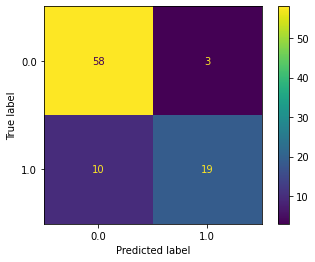

In [ ]:
plot_confusion_matrix(best_forest_precision, X_test_std, Y_test)
plt.show() 

##### Recall

In [ ]:
#Creating param grids for Random Forest
grid = [
  {'criterion' : ['gini', 'entropy'], 'bootstrap' : ['True', 'False'],
   'max_features' : ['auto', 'sqrt'], 'n_estimators' : [50], 'ccp_alpha': np.logspace(-4, -1, 20)},
]

forest_recall = RandomForestClassifier(class_weight='balanced')
forest_gs_recall = GridSearchCV(estimator=forest_recall, param_grid=grid, cv = 5, n_jobs=-1, scoring='recall')
forest_gs_recall.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
                          'ccp_alpha': array([0.0001    , 0.00014384, 0.00020691, 0.00029764, 0.00042813,
     

In [ ]:
best_forest_recall = forest_gs_recall.best_estimator_

print("Best Hyperparameters", forest_gs_recall.best_params_)
print('Training score:', forest_gs_recall.best_score_)
print('Test score:', best_forest_recall.score(X_test_std, Y_test))
model_scores.append([forest_gs_recall.best_score_, best_forest_recall.score(X_test_std, Y_test)])

Best Hyperparameters {'bootstrap': 'False', 'ccp_alpha': 0.023357214690901212, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50}
Training score: 0.776923076923077
Test score: 0.8888888888888888


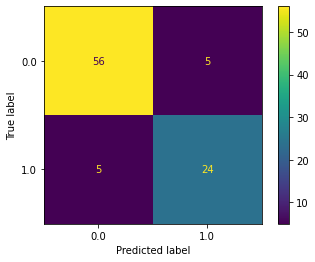

In [ ]:
plot_confusion_matrix(best_forest_recall, X_test_std, Y_test)
plt.show() 

##### F1

In [ ]:
#Creating param grids for Random Forest
grid = [
  {'criterion' : ['gini', 'entropy'], 'bootstrap' : ['True', 'False'],
   'max_features' : ['auto', 'sqrt'], 'n_estimators' : [50], 'ccp_alpha' : np.logspace(-5, -1, 20)},
]

forest_f1 = RandomForestClassifier(class_weight='balanced')
forest_gs_f1 = GridSearchCV(estimator=forest_f1, param_grid=grid, cv = 5, n_jobs=-1, scoring='f1')
forest_gs_f1.fit(X_train_std, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
       6.95192796e-05, 1.12883789e-04, 1.83298071e-04, 2.97635144e-04,
       4.83293024e-04, 7.84759970e-04, 1

In [ ]:
best_forest_f1 = forest_gs_f1.best_estimator_

print("Best Hyperparameters", forest_gs_f1.best_params_)
print('Training score:', forest_gs_f1.best_score_)
print('Test score:', best_forest_f1.score(X_test_std, Y_test))
model_scores.append([forest_gs_f1.best_score_, best_forest_f1.score(X_test_std, Y_test)])

Best Hyperparameters {'bootstrap': 'False', 'ccp_alpha': 0.03792690190732246, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50}
Training score: 0.7769987228607917
Test score: 0.8888888888888888


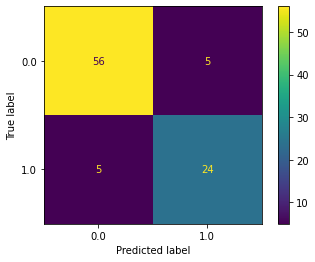

In [ ]:
plot_confusion_matrix(best_forest_f1, X_test_std, Y_test)
plt.show() 

## Ensemble Learning

### Majority Vote Classifier

In [ ]:
voting_clf = VotingClassifier(estimators=[
                                          ('Logistic Regression Accuracy metric', best_lr_accuracy),
                                          ('Logistic Regression Precision metric', best_lr_precision),
                                          ('Logistic Regression Recall metric', best_lr_recall),
                                          ('Logistic Regression F1 metric', best_lr_f1),
                                          ('Support Vector Machine Accuracy metric', best_svc_accuracy),
                                          ('Support Vector Machine Precision metric', best_svc_precision),
                                          ('Support Vector Machine Recall metric', best_svc_recall),
                                          ('Support Vector Machine F1 metric', best_svc_f1),
                                          ('MLP Classifier Accuracy metric', best_mlp_accuracy),
                                          ('MLP Classifier Precision metric', best_mlp_precision),
                                          ('MLP Classifier Recall metric', best_mlp_recall),
                                          ('MLP Classifier F1 metric', best_mlp_f1),
                                          ('Decision Tree Accuracy metric', best_tree_accuracy),
                                          ('Decision Tree Precision metric', best_tree_precision),
                                          ('Decision Tree Recall metric', best_tree_recall),
                                          ('Decision Tree F1 metric', best_tree_f1),
                                          ('Random Forest Accuracy metric', best_forest_accuracy),
                                          ('Random Forest Precision metric', best_forest_precision),
                                          ('Random Forest Recall metric', best_forest_recall),
                                          ('Random Forest F1 metric', best_forest_f1)
                                          ], voting = 'hard')

In [ ]:
voting_clf = voting_clf.fit(X_train_std, Y_train)
print('Training score ', voting_clf.score(X_train_std, Y_train))
print('Testing score ', voting_clf.score(X_test_std, Y_test))
model_scores.append([voting_clf.score(X_train_std, Y_train), voting_clf.score(X_test_std, Y_test)])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training score  0.9138755980861244
Testing score  0.8777777777777778


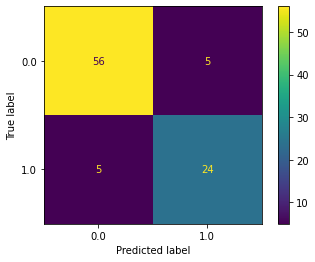

In [ ]:
plot_confusion_matrix(best_forest_recall, X_test_std, Y_test)
plt.show() 

## Comparing all the models

In [ ]:
model_data = np.array(model_scores)
models = ['lr_best_accuracy', 'lr_best_precision', 'lr_best_recall', 'lr_best_f1',
          'SVM_best_accuracy', 'SVM_best_precision', 'SVM_best_recall', 'SVM_best_F1',
          'MLP_Classifier_best_accuracy', 'MLP_Classifier_best_precision', 'MLP_Classifier_best_recall', 'MLP_Classifier_best_f1',
          'decision_tree_best_accuracy', 'decision_tree_best_precision', 'decision_tree_best_recall', 'decision_tree_best_f1',
          'random_forest_best_accuracy', 'random_forest_best_precision', 'random_forest_best_recall', 'random_forest_best_f1', 'Ensemble Learning']
table_scores = pd.DataFrame(data=model_data, index=models, columns=["Training score", "Testing score"])
table_scores

,Training score,Testing score
lr_best_accuracy,0.804413,0.844444
lr_best_precision,0.792308,0.822222
lr_best_recall,0.777343,0.844444
lr_best_f1,0.708107,0.822222
SVM_best_accuracy,0.799535,0.766667
SVM_best_precision,0.845714,0.711111
SVM_best_recall,0.836264,0.766667
SVM_best_F1,0.726491,0.822222
MLP_Classifier_best_accuracy,0.837863,0.811111
MLP_Classifier_best_precision,0.900000,0.722222


##### Training Score Comparison

Text(0, 0.5, 'Models')

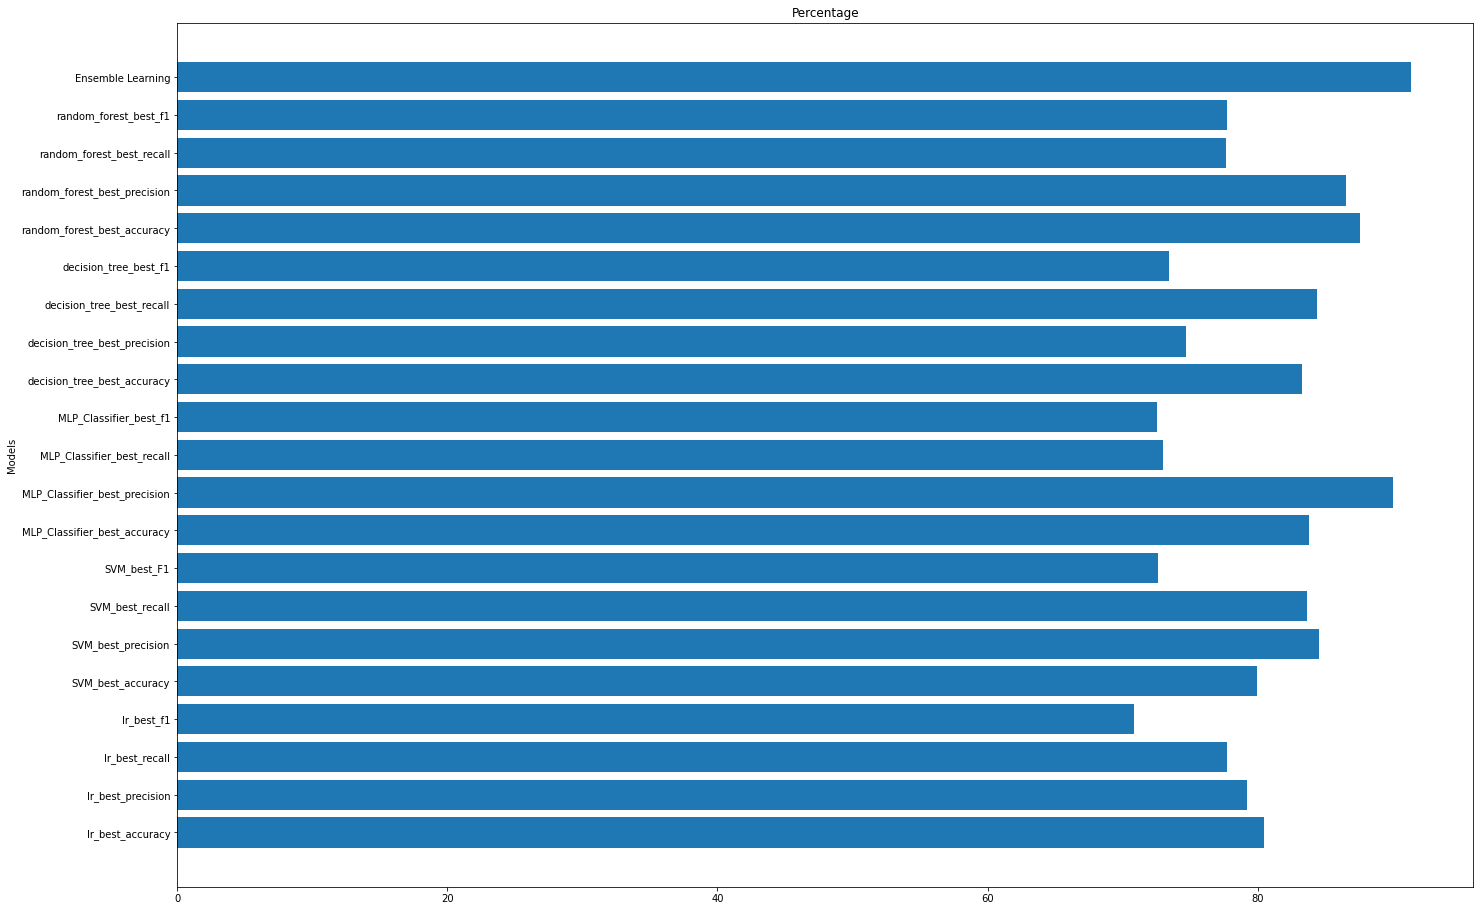

In [ ]:
models_training_scores = []
for combine_result in model_data:
    models_training_scores.append(round(combine_result[0] * 100, 2))
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.barh(models, models_training_scores)
plt.title('Percentage')
plt.ylabel('Models')

#### Testing Score Comparison

Text(0, 0.5, 'Models')

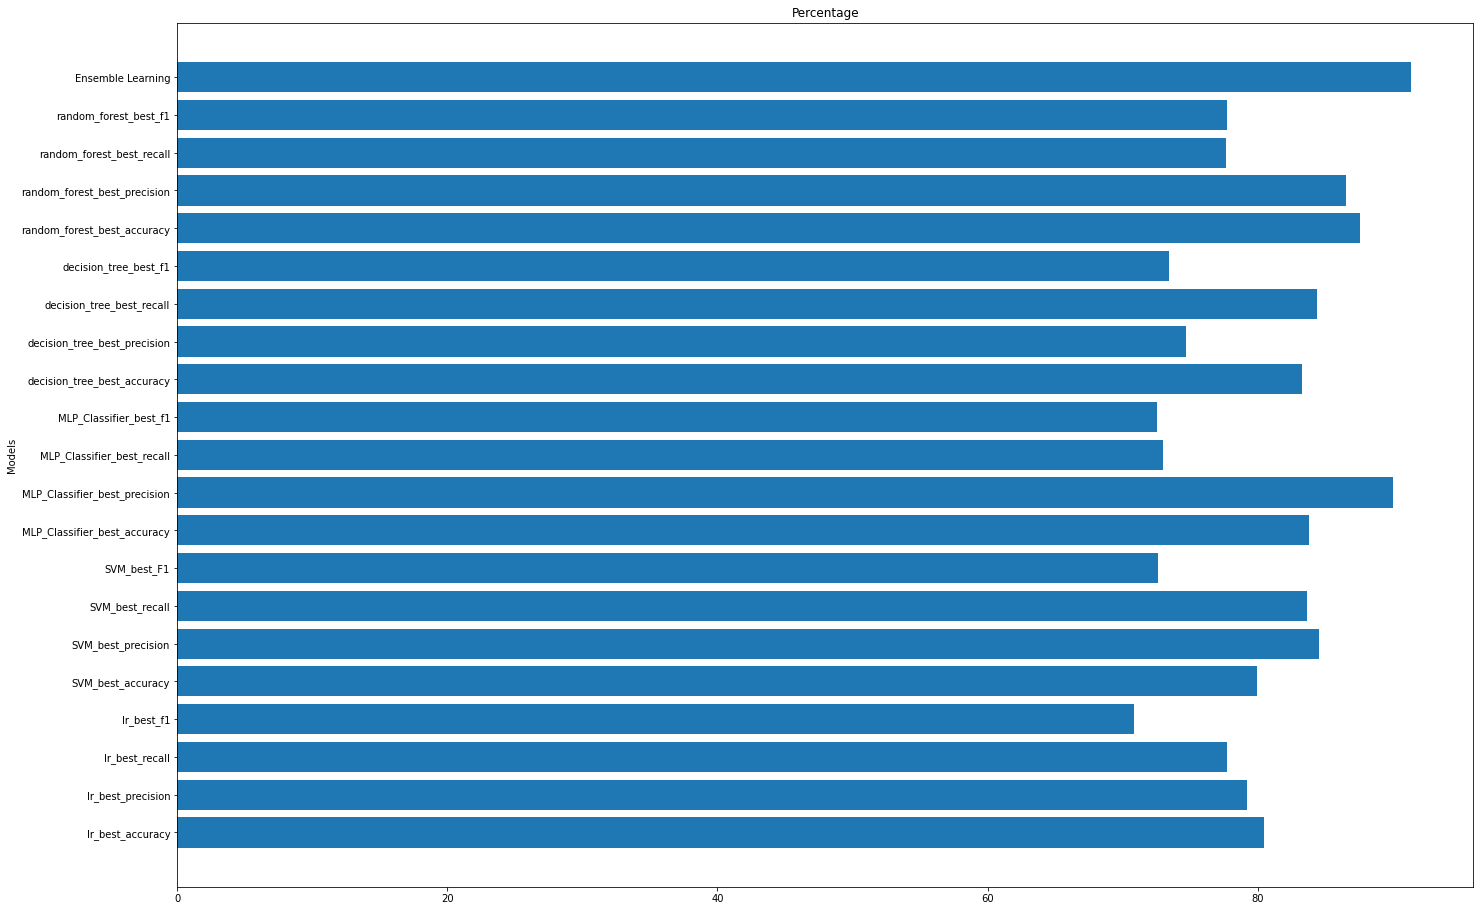

In [ ]:
models_testing_scores = []
for combine_result in model_data:
    models_testing_scores.append(round(combine_result[1] * 100, 2))
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.barh(models, models_training_scores)
plt.title('Percentage')
plt.ylabel('Models')

##### Combining the results in one graph

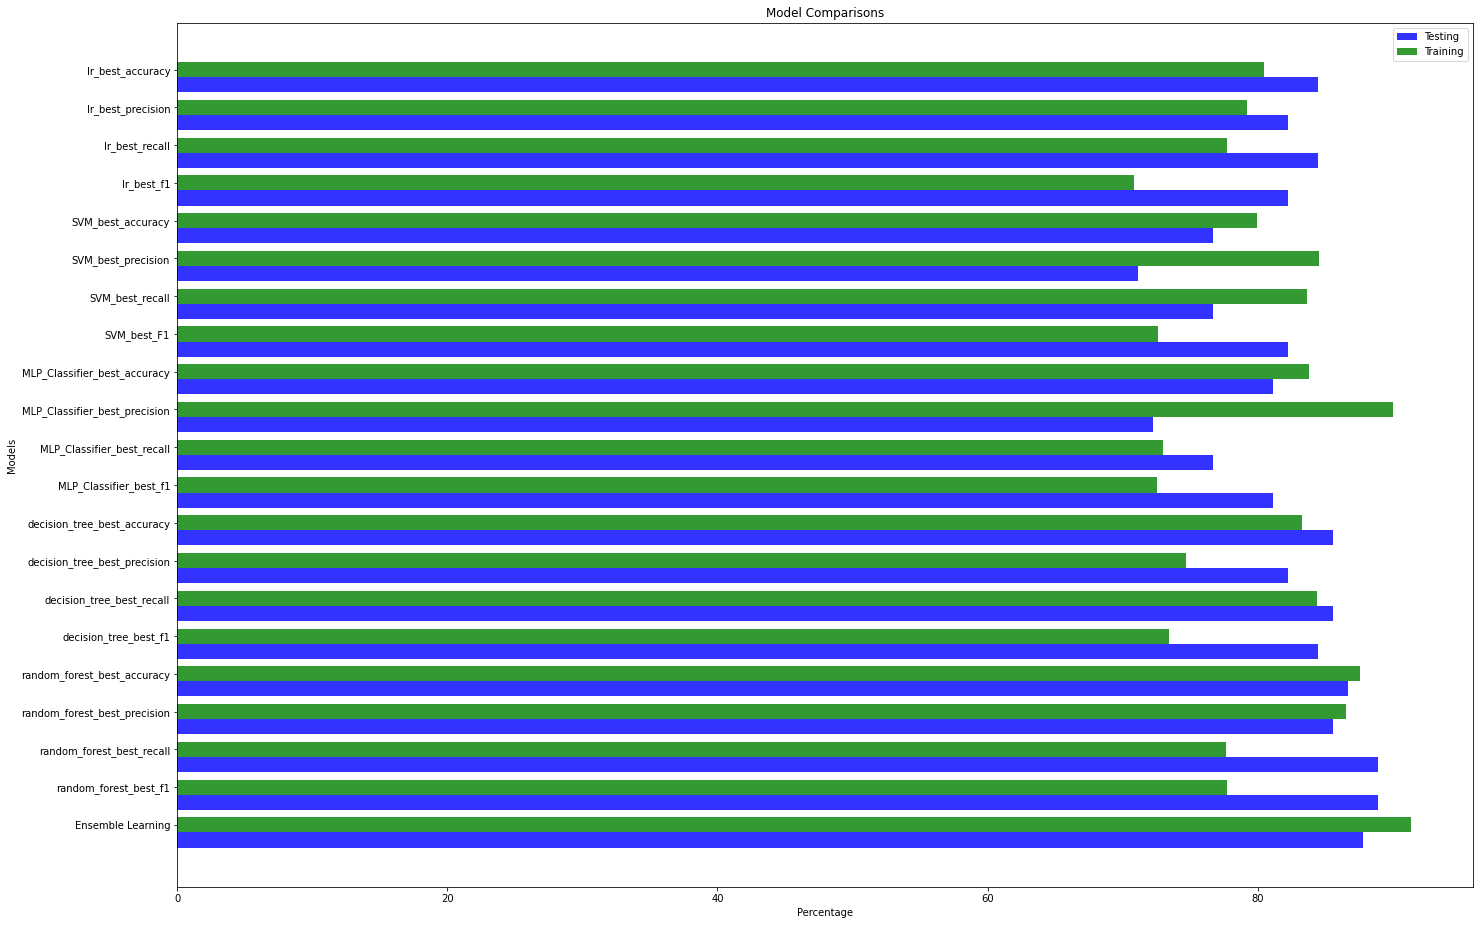

In [ ]:
n_groups = 21

# create plot
fig, ax = plt.subplots()
ax = fig.add_axes([0,0,3,3])
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8

rects1 = plt.barh(index, models_testing_scores[::-1], bar_width,
alpha=opacity,
color='b',
label='Testing')

rects2 = plt.barh(index + bar_width, models_training_scores[::-1], bar_width,
alpha=opacity,
color='g',
label='Training')

plt.xlabel('Percentage')
plt.ylabel('Models')
plt.title('Model Comparisons')
plt.yticks(index + bar_width, models[::-1])
plt.legend()

plt.show()